In [149]:
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [150]:
# prep data, covert date to datetime, split for train and test, and build model
sf_crime = pd.read_csv('../../assets/datasets/sf_crime_train.csv')

sf_crime = sf_crime.dropna()

sf_crime['Dates'] = pd.to_datetime(sf_crime.Dates)
sf_crime_dates = pd.DatetimeIndex(sf_crime.Dates.values, dtype='datetime64[ns]', freq=None)

sf_crime['hour'] = sf_crime_dates.hour
sf_crime['month'] = sf_crime_dates.month
sf_crime['year'] = sf_crime_dates.year

In [151]:
#sf_crime.describe(include='all')
sf_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015


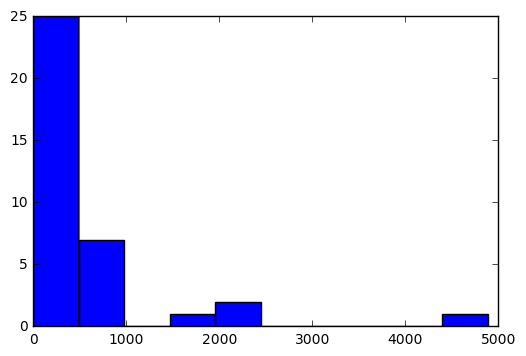

In [152]:
plt.hist(sf_crime["Category"].value_counts())

plt.show()

In [153]:
subset = ['VEHICLE THEFT','BURGLARY','DRUG/NARCOTIC']
sf_crime_sub = sf_crime[sf_crime['Category'].str.contains('|'.join(subset))]

#sf_sample = sf_crime_sub.sample(frac=0.50)

X = patsy.dmatrix('~ C(hour) + C(DayOfWeek) + C(PdDistrict)', sf_crime_sub)#C denotes categories
Y = sf_crime_sub.Category.values

# split for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=77)

In [154]:
# fit model with five folds and lasso regularization
# use Cs=15 to test a grid of 15 distinct parameters
# remeber: Cs describes the inverse of regularization strength
clf = LogisticRegressionCV(solver='liblinear', Cs =15, penalty ="l1", cv=5)
clf.fit(X_train,Y_train)


LogisticRegressionCV(Cs=15, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [155]:
# find best C per class
print('best C for class:')
best_C = {clf.classes_[i]:x for i, (x, c) in enumerate(zip(clf.C_, clf.classes_))}
print(best_C)

best C for class:
{'BURGLARY': 1.0, 'VEHICLE THEFT': 3.7275937203149381, 'DRUG/NARCOTIC': 1.0}


In [156]:
# fit regular logit model to 'DRUG/NARCOTIC' and 'BURGLARY' classes

#Drug/Narcotic
#use lasso penalty

logreg_1 = LogisticRegression(C=1, penalty="l1")
logreg_1.fit(X_train,Y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
logreg_2 = LogisticRegression(C=1, penalty="l1")
logreg_2.fit(X_train,Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
# build confusion matrices for the models above
Y_1_pred = logreg_1.predict(X_train)
Y_2_pred = logreg_2.predict(X_train)

conmat_1 = confusion_matrix(Y_train, Y_1_pred, labels=logreg_1.classes_)
conmat_1 = pd.DataFrame(conmat_1, columns=logreg_1.classes_, index=logreg_1.classes_)

conmat_2 = confusion_matrix(Y_train, Y_2_pred, labels=logreg_2.classes_)
conmat_2 = pd.DataFrame(conmat_2, columns=logreg_2.classes_, index=logreg_2.classes_)


In [159]:
# print classification reports
print classification_report(Y_train, Y_1_pred)

             precision    recall  f1-score   support

   BURGLARY       0.50      0.44      0.47       490
DRUG/NARCOTIC       0.70      0.30      0.42       332
VEHICLE THEFT       0.56      0.78      0.66       648

avg / total       0.57      0.56      0.54      1470



In [160]:
# run gridsearch using GridSearchCV and 5 folds
# score on f1_macro; what does this metric tell us?
logreg = LogisticRegression()
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']


In [161]:
# find the best parameter


In [162]:
# use this parameter to .fit, .predict, and print a classification_report for our X and Y


# Setting Thresholds for Binary Classes

In [163]:
#Get subsetj of categories we want to predict: one much worse that the other
subset = ['ASSAULT','VANDALISM']
sf_crime_sub = sf_crime[sf_crime['Category'].str.contains('|'.join(subset))]

#sf_sample = sf_crime_sub.sample(frac=0.50)
X = patsy.dmatrix('~C(hour) + C(DayOfWeek) + C(PdDistrict) + X + Y', sf_crime_sub)
Y = sf_crime_sub.Category.values

#split for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=5)
#or use from sklearn.model_selection import StratifiedKFold to ensure stratification

In [170]:
clf = LogisticRegressionCV(cv=5, scoring='accuracy')
clf.fit(X_train,Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0)

In [171]:
Ypred = clf.predict(X_test)

conmat = confusion_matrix(Y_test, Ypred, labels=clf.classes_)
pd.DataFrame(conmat, columns=clf.classes_, index=clf.classes_)

,ASSAULT,VANDALISM
ASSAULT,458,50
VANDALISM,229,60


In [174]:
print classification_report(Y_test,Ypred)

             precision    recall  f1-score   support

    ASSAULT       0.67      0.90      0.77       508
  VANDALISM       0.55      0.21      0.30       289

avg / total       0.62      0.65      0.60       797



In [176]:
Y_test

array(['VANDALISM', 'ASSAULT', 'VANDALISM', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'VANDALISM', 'ASSAULT', 'VANDALISM', 'ASSAULT',
       'ASSAULT', 'VANDALISM', 'VANDALISM', 'ASSAULT', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'VANDALISM', 'VANDALISM', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM', 'ASSAULT',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'VANDALISM', 'ASSAULT', 'VANDALISM',
       'VANDALISM', 'VANDALISM', 'ASSAULT', 'VANDALISM', 'VANDALISM',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM',
       'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'VANDALISM',
       'ASSAULT', 'VANDALISM', 'ASSAULT', 'ASSAULT', 'ASSAULT', 'ASSAULT',
       'ASSAULT', 'VANDALISM', 'ASSAULT', 'VANDALISM', 'ASSAULT',
       'ASSAULT', 'ASSAULT', 'VANDALISM', '

In [185]:
from sklearn import metrics

In [186]:
y_score = clf.fit(X_train, Y_train).decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_score, pos_label='VANDALISM')

In [187]:
np.round(y_score,2)

array([-0.64,  0.2 , -1.15, -1.07, -0.08, -1.2 ,  0.19, -0.5 , -0.39,
       -0.09, -1.14,  0.23, -0.78, -0.74,  0.21, -1.2 , -0.7 , -0.65,
       -0.07, -0.42, -0.54,  0.29, -1.27, -0.29, -1.04, -1.37, -1.64,
       -1.15, -0.09, -1.17, -1.57, -0.75, -1.21, -1.04, -0.16, -1.17,
       -0.3 , -0.62, -0.09, -0.99, -1.15, -0.54, -1.61, -0.16,  0.09,
       -1.49,  0.01, -0.52, -0.45, -1.42,  0.02, -0.6 ,  0.07, -0.72,
       -1.11, -1.03, -0.56, -1.17, -0.3 ,  0.06, -1.69,  0.41, -0.53,
       -0.53, -0.93, -1.15, -0.75, -0.82, -1.14, -0.4 , -0.45, -1.62,
       -0.59,  0.09, -0.91,  0.02, -0.81, -0.17, -0.51, -0.36, -1.04,
       -0.89, -0.54, -0.02, -1.86, -0.17, -1.7 , -1.71, -0.81, -0.23,
       -0.22, -0.82, -0.92, -0.66,  0.07,  0.23, -0.27, -0.39, -0.76,
        0.08, -0.63, -1.9 , -1.05,  0.01, -1.23,  0.18, -0.23, -1.09,
       -0.81, -0.44, -0.69,  0.01, -1.21, -0.24, -0.94, -0.44, -0.86,
       -0.3 , -0.3 , -1.08, -0.32, -0.7 ,  0.28, -1.73, -0.12, -1.08,
       -0.32, -0.5 ,

In [190]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 12
plt.title("ROC curve")
plt.xlabel("FPR (1 - Specificity)")
plt.ylabel("TPR (Sensitivity)")
plt.grid(True)

In [191]:
def evaluate_threshold(threshold):
    print('TPR: ', tpr[thresholds > threshold][-1])
    print("FPR: ", tpr[thresholds > threshold][-1])

In [193]:
for i in np.arange(min(thresholds), max(thresholds),0.5):
    print("Threshold:"),i
    evaluate_threshold(i)
    print

Threshold: -2.25267607105
('TPR: ', 1.0)
('FPR: ', 1.0)

Threshold: -1.75267607105
('TPR: ', 0.98615916955017302)
('FPR: ', 0.98615916955017302)

Threshold: -1.25267607105
('TPR: ', 0.89965397923875434)
('FPR: ', 0.89965397923875434)

Threshold: -0.75267607105
('TPR: ', 0.70242214532871972)
('FPR: ', 0.70242214532871972)

Threshold: -0.25267607105
('TPR: ', 0.37024221453287198)
('FPR: ', 0.37024221453287198)

Threshold: 0.24732392895
('TPR: ', 0.086505190311418678)
('FPR: ', 0.086505190311418678)

Threshold: 0.74732392895
('TPR: ', 0.0)
('FPR: ', 0.0)

Threshold: 1.24732392895
('TPR: ', 0.0)
('FPR: ', 0.0)

